<a href="https://colab.research.google.com/github/giardinas-dev/advanced-ai-production/blob/main/Monitoraggio_reputazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBIETTIVO**

Il progetto si concentra sull’utilizzo di tecnologie avanzate di machine learning e MLOps per automatizzare l’analisi del sentiment nei social media. In particolare, si impiega un modello pre-addestrato FastText per classificare rapidamente e con precisione il sentiment dei testi. Viene inoltre sviluppata una pipeline CI/CD che permette il training automatizzato del modello, con possibilità di configurazioni per il fine tuning, oltre a gestire il testing e il deploy dell’applicazione. Questo approccio garantisce scalabilità, affidabilità e un monitoraggio continuo delle performance per supportare una gestione efficace della reputazione online.

In [ ]:
import os
from getpass import getpass

os.chdir('/content')
REPO_NAME = 'sentiment-analysis-mlops'

# Se non esiste, clona il repo
if not os.path.exists(REPO_NAME):
    token = getpass('Inserisci il tuo GitHub Token (con permessi di clone): ')
    repo_url = f"https://{token}@github.com/giardinas-dev/{REPO_NAME}.git"
    !git clone {repo_url}
    os.chdir(REPO_NAME)
    !pip install -r requirements.txt
else:
    print(f"La cartella '{REPO_NAME}' esiste già.")



Inserisci il tuo GitHub Token (con permessi di clone): ··········
Cloning into 'sentiment-analysis-mlops'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 325 (delta 3), reused 9 (delta 2), pack-reused 311 (from 1)
Receiving objects: 100% (325/325), 556.14 KiB | 1.59 MiB/s, done.
Resolving deltas: 100% (153/153), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
# commit -> push
import os
from getpass import getpass
os.chdir("/content/sentiment-analysis-mlops")
!git config --global user.email "giardina2@tiscali.it"
!git config --global user.name "giardinas-dev"
!git add .
!git commit -m "fix train/utils/app.py/ train.yml"
!git push origin main


[main bbfe36e] fix train/utils/app.py/ train.yml
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 365 bytes | 365.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/giardinas-dev/sentiment-analysis-mlops.git
   936c2b2..bbfe36e  main -> main


**GITHUB**

Per la gestione del progetto è stato utilizzato un repository GitHub dedicato, denominato sentiment-analysis-mlops, che integra le GitHub Actions per automatizzare i workflow di training, testing e deployment tramite pipeline CI/CD. Il repository, accessibile al link https://github.com/tuo-username/sentiment-analysis-mlops, contiene tutto il codice necessario per il fine tuning di modelli pre-addestrati come RoBERTa, ottimizzati per l’analisi del sentiment sui dati estratti da social media. La struttura del progetto include moduli Python per la gestione del dataset, il training del modello, test di integrazione, e utilità specifiche per preprocessamento e valutazione. Il file app.py è progettato per l’integrazione con Hugging Face Space, permettendo così un deploy scalabile e fruibile direttamente tramite la piattaforma Hugging Face. Le GitHub Actions configurate nel repository garantiscono un training automatizzato del modello con possibilità di configurazioni di fine tuning e un deploy continuo, assicurando un processo di sviluppo efficiente e ripetibile. Questa architettura completa facilita il monitoraggio costante delle performance del modello e l’aggiornamento tempestivo, supportando efficacemente il monitoraggio della reputazione online tramite l’analisi automatica del sentiment.


**WORKFLOW CI/CD**

Il progetto integra due workflow principali tramite GitHub Actions per garantire automazione, qualità e facilità di deploy:

*CI/CD Pipeline* (ci-cd.yml): Questo workflow si attiva al push sul branch principale main. Prevede il checkout del codice, setup dell’ambiente Python, installazione delle dipendenze, download di modelli SpaCy, esecuzione di test automatici e infine il push del codice aggiornato su Hugging Face Space (escludendo la cartella immagini) tramite autenticazione con token.

*Train and Push Model* (*train.yml*): Esegue il training e il push del modello verso Hugging Face in modo parametrizzabile tramite input manuale (*workflow_dispatch*). Configura l’ambiente, installa dipendenze, effettua il login su Hugging Face, esegue il training tramite train.py passando i parametri specificati (*epoche, learning rate, nome modello, subset ratio*) e carica i modelli addestrati sul repository remoto.

Questi workflow permettono di gestire in modo automatizzato l’intero ciclo di vita del modello, dalla fase di sviluppo e test fino al deploy in produzione, assicurando ripetibilità e integrazione continua.

**TRAINING**

Il training del modello può essere eseguito sia localmente sia tramite workflow automatizzati definiti in GitHub Actions. Il codice principale per l’addestramento è contenuto in train.py, che accetta parametri configurabili come il numero di epoche, il learning rate, il modello da usare e la percentuale di dati (*subset ratio*) da utilizzare. Lo script carica dati, modello, tokenizer e altre risorse tramite la funzione prepare_data_and_model definita in utils.py, quindi inizializza un’istanza della classe SentimentAnalyzer per eseguire il fine tuning del modello pre-addestrato RoBERTa su un sottoinsieme stratificato del dataset Twitter. Al termine dell’addestramento, il modello e il tokenizer possono essere automaticamente pushati sul repository Hugging Face Hub per un deploy semplificato.

È stato inoltre svolto un training tramite GitHub Actions su un subset stratificato di circa 8.600 tweet, corrispondente allo 0.18% del dataset originale, a causa delle risorse computazionali limitate. Il workflow del training automatizzato è disponibile e consultabile a questo link: https://github.com/giardinas-dev/sentiment-analysis-mlops/actions/runs/16780720836/job/47518326422 .

Prepare model and data...


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:999: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:492: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/configuration_auto.py:1229: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(

Testing samples:   0%|          | 0/69 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `enc

Evaluation Results:
  - Average Loss : 0.9508
  - Accuracy     : 78.86%
  - F1 Score     : 0.7905
              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       801
     Neutral       0.68      0.82      0.75       647
    Positive       0.82      0.74      0.78       737

    accuracy                           0.79      2185
   macro avg       0.79      0.79      0.79      2185
weighted avg       0.80      0.79      0.79      2185



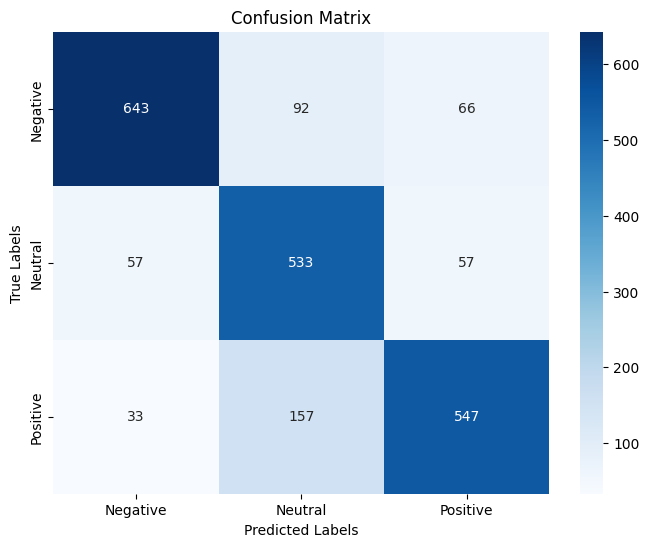

In [ ]:
# Valutazione del modello trainato giardinsdev/sentiment-analyzer-twitter

import importlib
importlib.reload(src.utils)
from src.utils import SentimentAnalyzer, preprocess,prepare_data_and_model
from sklearn.metrics import classification_report


assets = prepare_data_and_model(learning_rate= 3e-5, model_name = "giardinsdev/sentiment-analyzer-twitter"  , subset_ratio = 0.18, hf_token="****************")

model = assets["model"]
tokenizer = assets["tokenizer"]
X_train = assets["X_train"]
y_train = assets["y_train"]
config = assets["config"]
X_test = assets["X_test"]
y_test = assets["y_test"]
optimizer = assets["optimizer"]
loss_fn = assets["loss_fn"]
device = assets["device"]


sentiment = SentimentAnalyzer(model=model,
    tokenizer=tokenizer,config = config,
    criterion = loss_fn,opt = optimizer, epochs=15,freeze_base = True)


# Training locale
#sentiment.train(X_train, y_train, X_test, y_test, epochs=10)

avg_loss, accuracy , f1, y_pred = sentiment.evaluate_full_metrics(X_test, y_test)
print(f"Evaluation Results:\n"
      f"  - Average Loss : {avg_loss:.4f}\n"
      f"  - Accuracy     : {accuracy:.2%}\n"
      f"  - F1 Score     : {f1:.4f}")

report = classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"])
print(report)
y_pred = [int(x) for x in y_pred]
sentiment.plot_confusion_matrix(y_test, y_pred, ["Negative", "Neutral", "Positive"])

# Training con script
# Esegui lo script Python (esempio train.py)
#!python src/train.py

I risultati ottenuti con il modello BERT addestrato su un sottoinsieme di 8600 tweet sono molto soddisfacenti, con un’accuratezza del 78.86% e un F1 score medio di circa 0.79. Il modello mostra ottime performance nel riconoscere il sentiment negativo, con alta precisione (0.88) e buon recall (0.80). In particolare, durante il testing, il modello si è dimostrato efficace nel gestire tweet negativi con sfumature sarcastiche, che spesso rappresentano una sfida per i sistemi di sentiment analysis. Per la classe neutral, la precisione è più bassa (0.68) ma il recall rimane elevato (0.82), mentre la classe positiva presenta un buon equilibrio tra precisione (0.82) e recall (0.74).

L’average loss di 0.9508 indica una buona convergenza, e l’uso di 8 epoche con learning rate 2e-5 ha permesso un addestramento stabile senza overfitting. Sebbene i risultati siano solidi, si potrebbero migliorare ulteriormente soprattutto le performance sulla classe neutral, magari aumentando i dati o applicando tecniche di bilanciamento.

In generale, il modello dimostra una buona capacità di analisi del sentiment, inclusa la gestione di casi complessi come il sarcasmo, e rappresenta una base solida per sviluppi futuri.



**HUGGING FACE**:*SPACE*

Il modello di sentiment analysis è reso disponibile attraverso un’applicazione web interattiva ospitata su Hugging Face Spaces, realizzata con Gradio e gestita tramite lo script app.py. Questo script carica il modello pre-addestrato e il tokenizer direttamente dal repository Hugging Face Hub, utilizza la classe SentimentAnalyzer per effettuare le predizioni e mostra i risultati con un’interfaccia utente semplice e intuitiva. Inoltre, ad ogni richiesta, lo script invia in background le metriche di analisi a un endpoint FastAPI esterno per il monitoraggio delle prestazioni in produzione. Il deployment è completamente automatizzato tramite il workflow GitHub Actions definito nel file *ci-cd.yml*, che esegue il push automatico dell’applicazione aggiornata su Hugging Face Spaces ogni volta che viene effettuata una modifica al file app.py, assicurando così che l’ultima versione del codice sia sempre attiva e disponibile.
https://huggingface.co/spaces/giardinsdev/sentiment-analyzer-twitter


**HUGGING FACE**:*MODEL*

Ogni volta che viene completato un nuovo ciclo di training, un workflow GitHub Actions (definito in *train.yml*) si occupa di salvare automaticamente il modello aggiornato sul repository Hugging Face Hub. Questo processo automatizzato facilita il versionamento e la distribuzione continua del modello, garantendo che la versione più recente sia sempre accessibile sia per il deploy in produzione che per eventuali ulteriori riaddestramenti o valutazioni.

https://huggingface.co/giardinsdev/sentiment-analyzer-twitter

In [ ]:
!pip install -q huggingface_hub
from huggingface_hub import notebook_login
notebook_login()


## Update del modello ( se trainato in locale )
sentiment.model.push_to_hub("giardinsdev/sentiment-analyzer-twitter")
sentiment.tokenizer.push_to_hub("giardinsdev/sentiment-analyzer-twitter")

**MONITORAGGIO**

Il monitoraggio delle performance del modello di sentiment analysis è stato implementato tramite un endpoint FastAPI dedicato, accessibile all'indirizzo: https://metrics-fastapi-sentiment-analysis.onrender.com/metrics. Questo endpoint riceve i dati relativi al sentiment analizzato, al punteggio associato e al testo sottoposto a valutazione, permettendo una raccolta dettagliata delle metriche operative.

Ogni richiesta al modello, effettuata tramite l'interfaccia Gradio definita in app.py, invia automaticamente una POST al suddetto endpoint. Le informazioni trasmesse includono il tipo di sentiment (positivo, negativo o neutro), il punteggio di confidenza e il testo analizzato. Questo flusso consente di monitorare in tempo reale l'utilizzo del modello, raccogliendo dati su frequenza d'uso, distribuzione dei sentimenti e lunghezza media dei testi processati.

Per la visualizzazione e l'analisi delle metriche, è stato integrato Grafana Cloud ( come mostrato su [github](https://github.com/giardinas-dev/sentiment-analysis-mlops/blob/main/images/image_graph.png)) che consente di creare dashboard personalizzate per monitorare l'andamento delle metriche nel tempo. In alternativa, è possibile utilizzare script Python per recuperare i dati in formato JSON dall'API /metrics_data e generare visualizzazioni tramite librerie come Matplotlib o Plotly, per analisi più approfondite o report personalizzati.

Il progetto relativo a tale endpoint è disponibile su GitHub all'indirizzo: https://github.com/giardinas-dev/metrics-fastapi-sentiment-analysis/tree/main, mentre il deploy è visibile su Render: https://dashboard.render.com/project/prj-d295p6ali9vc739hro10/environment/evm-d295p6ali9vc739hro1g .

Percentuale sentiment nelle ultime 2 ore:
 label
negative    40.594059
neutral     33.663366
positive    25.742574
Name: count, dtype: float64

Statistiche value_avg:
             mean  std
label                
negative  0.7388  0.0
neutral   0.7576  0.0
positive  0.7335  0.0

Statistiche text_length_avg:
            mean  std
label               
negative  25.59  0.0
neutral   22.56  0.0
positive  25.73  0.0


/tmp/ipython-input-2840578524.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, order=['negative', 'neutral', 'positive'], palette=['red', 'gray', 'green'])


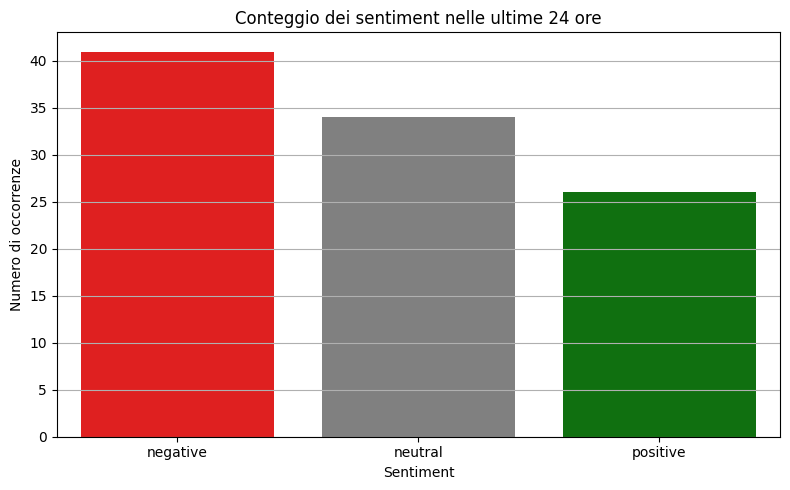

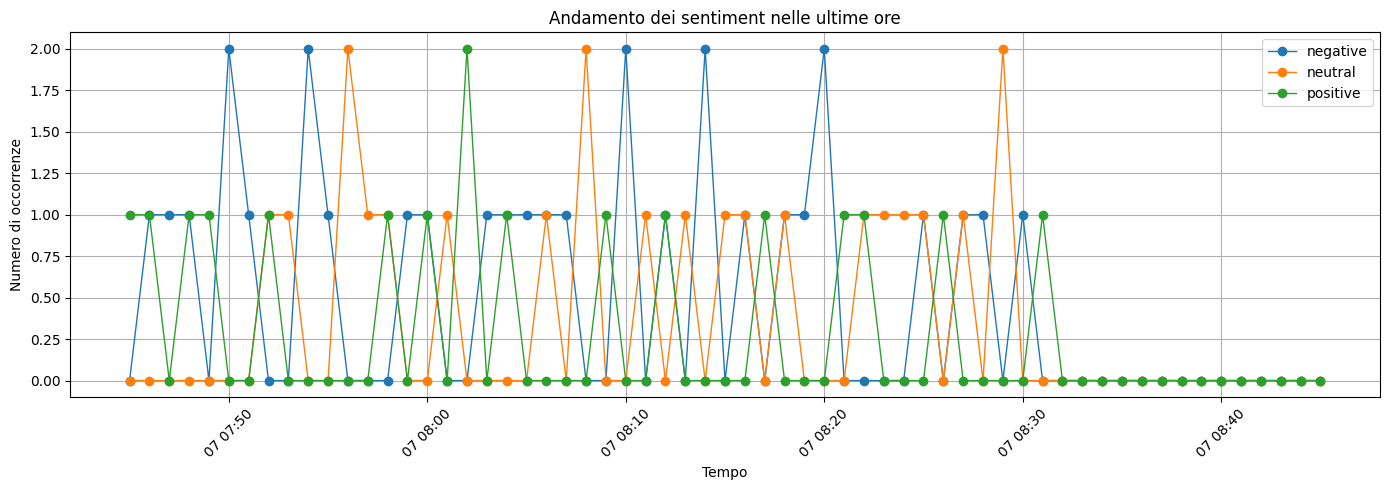

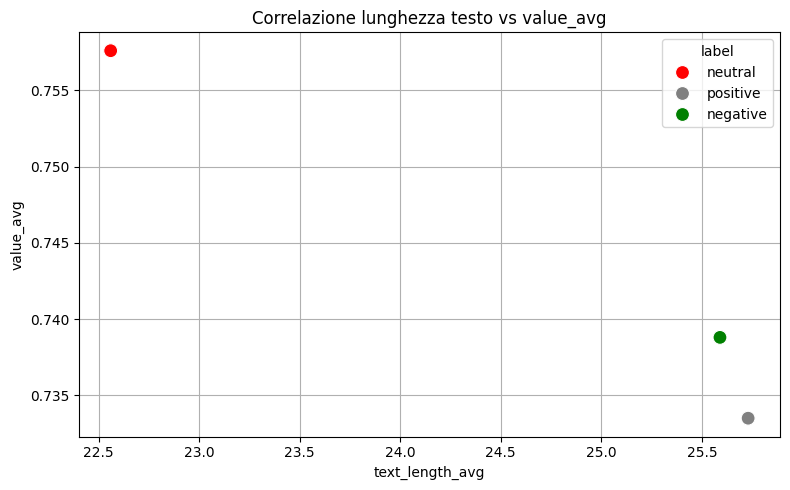

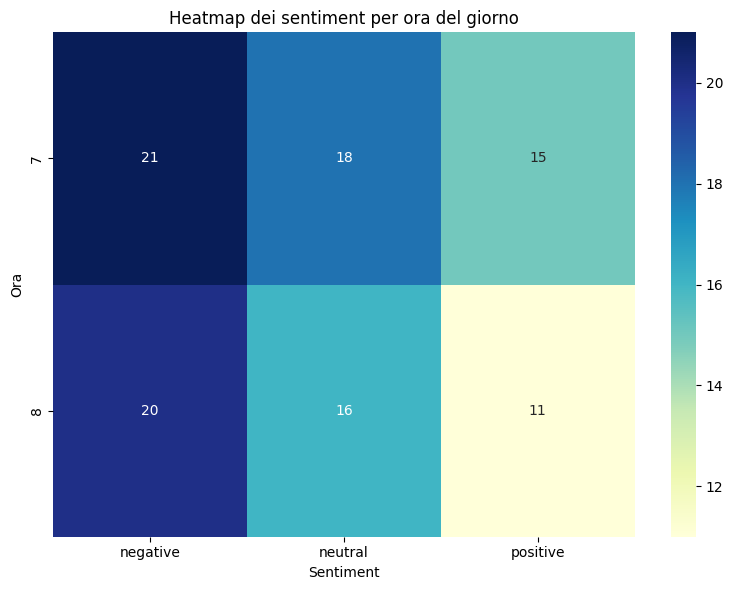

In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns

#1. Fetch data from API
url = "https://metrics-fastapi-sentiment-analysis.onrender.com/metrics_data"
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"API call failed with status code {response.status_code}")
data = response.json()



all_rows = []
for row in data:
    for ts in row["timestamps"]:
        all_rows.append({
            "label": row["label"],
            "timestamp": pd.to_datetime(ts),
            "value_avg": row["value_avg"],
            "text_length_avg": row["text_length_avg"]
        })

df = pd.DataFrame(all_rows)

# Filter last 24 hours
now = datetime.utcnow()
yesterday = now - timedelta(days=1)
df = df[df["timestamp"] >= yesterday]

# === 3. Statistics ===
# Percentuali di sentiment
sentiment_counts = df['label'].value_counts()
sentiment_percent = sentiment_counts / sentiment_counts.sum() * 100

# Media e deviazione standard dei valori
value_stats = df.groupby('label')['value_avg'].agg(['mean', 'std'])
length_stats = df.groupby('label')['text_length_avg'].agg(['mean', 'std'])

print("Percentuale sentiment nelle ultime 2 ore:\n", sentiment_percent)
print("\nStatistiche value_avg:\n", value_stats)
print("\nStatistiche text_length_avg:\n", length_stats)

# === 4. Plot 1: Conteggio dei sentiment ===
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df, order=['negative', 'neutral', 'positive'], palette=['red', 'gray', 'green'])
plt.title("Conteggio dei sentiment nelle ultime 24 ore")
plt.ylabel("Numero di occorrenze")
plt.xlabel("Sentiment")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# === 5. Plot 2: Timeline sentiment per minuto (ultime 5 ore) ===

# Timestamp attuale arrotondato al minuto
now_ts = pd.Timestamp.now().floor('min')
five_hours_ago_ts = now_ts - pd.Timedelta(hours=1)

# Range di minuti per le ultime 5 ore
minutes_range = pd.date_range(start=five_hours_ago_ts, end=now_ts, freq='min')

# Arrotonda i timestamp del DataFrame al minuto
df['timestamp_minute'] = df['timestamp'].dt.floor('min')

# Filtro: solo dati delle ultime 5 ore
df_filtered = df[df['timestamp_minute'].between(five_hours_ago_ts, now_ts)]

# Plot
plt.figure(figsize=(14, 5))
for label in ['negative', 'neutral', 'positive']:
    df_label = df_filtered[df_filtered['label'] == label]
    df_minutely = df_label.groupby('timestamp_minute').size()
    df_minutely = df_minutely.reindex(minutes_range, fill_value=0)
    plt.plot(df_minutely.index, df_minutely.values, marker='o', label=label, linewidth=1)

plt.title("Andamento dei sentiment nelle ultime ore")
plt.xlabel("Tempo")
plt.ylabel("Numero di occorrenze")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# === 6. Plot 4: Scatter text length vs value_avg ===
plt.figure(figsize=(8,5))
sns.scatterplot(x='text_length_avg', y='value_avg', hue='label', data=df, palette=['red','gray','green'], s=100)
plt.title("Correlazione lunghezza testo vs value_avg")
plt.xlabel("text_length_avg")
plt.ylabel("value_avg")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Heatmap: sentiment per ora ===
df['hour'] = df['timestamp'].dt.hour
heatmap_data = df.pivot_table(index='hour', columns='label', aggfunc='size', fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap dei sentiment per ora del giorno")
plt.ylabel("Ora")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

#Il codice per la realizzazione dei grafici è stato sviluppato con il supporto di ChatGPT, che ha contribuito a migliorare l’efficienza e la chiarezza del processo di scrittura.